# Actividad 1: Conceptos generales de redes neuronales
En esta actividad vamos a revisar algunos de los conceptos basicos de las redes neuronales, pero no por ello menos importantes.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en este enlace.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, asegúrate de que los resultados de ejecutar tu código han quedado guardados (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

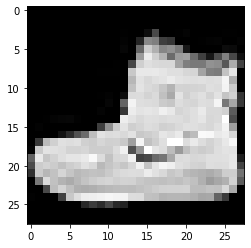

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy utiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas que las imágenes cómo eran las imagenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten sólo toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 1 (3.5 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

# Definición de la arquitectura

In [6]:
# Como necesitamos una red neuronal de tres capas (una secuencia de tres capas)
# utilizamos la función ‘Sequential’ de Keras para crearla.
nn = tf.keras.Sequential()

#Ahora añadimos la capa inicial.
#Como nuestro imput es una matriz, necesitamos pasarlo a un vector
#para que pueda ser procesado por la entrada de la red utilizando Flatten.
#Cada piexel de la imágen es una entrada, al ser una red neuronal clásica
#Con 'input_shape' le indicamos la forma de enrtada
nn.add(tf.keras.layers.Flatten(input_shape=(28,28)))

#Hidden layer de tamaño 128 y funcion de activación Sigmoid
#Añadimos una capa densamente conectada con la siguiente capa con Dense
nn.add(tf.keras.layers.Dense(128, activation='sigmoid'))

#Ultima capa softmax, conviertiendo el vector de 10 
#en probabilidades de cada clase
nn.add(tf.keras.layers.Dense(10, activation='softmax'))


# Configuración del modelo

In [7]:
#Para configurar el modelo utilizamos la función 'compile'
#Activamos la métrica accuracy para ver la precisión del modelos
#con 'metrics' y función de perdida "sparse_categorical_crossentropy" 
#para dos o más clases
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Entrenamiento del modelo

In [8]:
nn.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 890us/step - loss: 0.5377 - accuracy: 0.8158
Epoch 2/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.3887 - accuracy: 0.8606
Epoch 3/10
1875/1875 [==============================] - 2s 883us/step - loss: 0.3533 - accuracy: 0.8715
Epoch 4/10
1875/1875 [==============================] - 2s 849us/step - loss: 0.3292 - accuracy: 0.8802
Epoch 5/10
1875/1875 [==============================] - 2s 922us/step - loss: 0.3095 - accuracy: 0.8878
Epoch 6/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.2945 - accuracy: 0.8915
Epoch 7/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.2802 - accuracy: 0.8960
Epoch 8/10
1875/1875 [==============================] - 2s 831us/step - loss: 0.2683 - accuracy: 0.9005
Epoch 9/10
1875/1875 [==============================] - 2s 851us/step - loss: 0.2581 - accuracy: 0.9051
Epoch 10/10
1875/1875 [==============================] - 1s 789u

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [9]:
test_loss, test_accuracy = nn.evaluate(test_images,  test_labels, verbose=2)

print('Precisión del modelo:', test_accuracy)

313/313 - 0s - loss: 0.3253 - accuracy: 0.8839

Precisión del modelo: 0.883899986743927


Los resultados obtenidos son parecido al del entrenamiento, podemos concluir que el modelo tiene un buen desempeño para la clasificación de imágenes.

Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

# **Ejercicio 1: Funcionamiento de las predicción de la red neuronal**

Para este primer ejercicio sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador para las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [10]:
classifications = nn.predict(test_images)

In [13]:
print("Clasificación para la primera imagen {}".format(classifications[0]))

Clasificación para la primera imagen [6.8518983e-07 3.7748836e-07 1.1114530e-06 5.4537136e-06 2.1973362e-06 1.2093046e-02 7.4550744e-06 1.5427247e-02 3.2909145e-05 9.7242951e-01]


In [15]:
np.argmax(classifications[0]), test_labels[0]

(9, 9)

Tu respuesta a la pregunta 3.1 aquí:
Porque al utilizar 'softmax' en la última capa la red neuronal devuelve un vector con el tamaño de numero de clases a clasificar. Los valores del vector son las probabilidades que estima la red neuronal de pertenecer a cada clase.

Tu respuesta a la pregunta 3.2 aquí:

La clase para la primera entrada es: 9, Ankle boot

# **Ejercicio 2: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **pregunta 4.1 (0.25 puntos)**: 512 neuronas en la capa oculta
* **pregunta 4.2 (0.25 puntos)**:1024 neuronas en la capa oculta

y entrena la red en ambos casos.

**pregunta 4.3 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

In [26]:
# Red con 512 en la capa oculta
nn_512 = tf.keras.Sequential()
nn_512.add(tf.keras.layers.Flatten(input_shape=(28,28)))
nn_512.add(tf.keras.layers.Dense(512, activation='sigmoid'))
nn_512.add(tf.keras.layers.Dense(10, activation='softmax'))

nn_512.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

nn_512.fit(training_images, training_labels, epochs=10)


test_loss, test_accuracy = nn_512.evaluate(test_images,  test_labels, verbose=2)

print('Precisión del modelo:', test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5083 - accuracy: 0.8168
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3840 - accuracy: 0.8605
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3440 - accuracy: 0.8741
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3157 - accuracy: 0.8829
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2754 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2602 - accuracy: 0.9035
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2455 - accuracy: 0.9093
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2340 - accuracy: 0.9116
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.221

In [27]:
#Red con 1024
nn_1024 = tf.keras.Sequential()
nn_1024.add(tf.keras.layers.Flatten(input_shape=(28,28)))
nn_1024.add(tf.keras.layers.Dense(1024, activation='sigmoid'))
nn_1024.add(tf.keras.layers.Dense(10, activation='softmax'))

nn_1024.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

nn_1024.fit(training_images, training_labels, epochs=10)

test_loss, test_accuracy = nn_1024.evaluate(test_images,  test_labels, verbose=2)

print('Precisión del modelo:', test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5020 - accuracy: 0.8192
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3845 - accuracy: 0.8612
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3419 - accuracy: 0.8747
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3113 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2882 - accuracy: 0.8939
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2686 - accuracy: 0.8990
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2514 - accuracy: 0.9055
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2377 - accuracy: 0.9102
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2237 - accuracy: 0.9158
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.213

Tu respuesta a la pregunta 4.3 aquí:

En ambos casos hemos logrado reducir la perdida y aumentado la precisión, pero un unos valores muy pequeños. El impacto es mínimo, y hemos aumentando el tiempo de entrenamiento.


Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 5.1 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 5.1 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?

In [29]:
classifications = nn_512.predict(test_images)

print("Clasificación para la primera imagen con 512: ", np.argmax(classifications[0]))

classifications = nn_1024.predict(test_images)

print("Clasificación para la primera imagen con 1024: ", np.argmax(classifications[0]))

Clasificación para la primera imagen con 512:  9
Clasificación para la primera imagen con 1024:  9


Tu respuesta a la pregunta 5.1 aquí:

Las dos redes han predecido la misma clase que la red inicial.

Tu respuesta a la pregunta 5.2 aquí:

Esto nos quiere decir que tener un menor número menor de neuronas no es peor que tener más, para este ejemplo que estamos trabajando.

# **Ejercicio 3: ¿por qué es tan importante la capa Flatten?**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 6 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [37]:
nn = tf.keras.Sequential()
nn.add(tf.keras.layers.Dense(28, input_shape=(28,)))
nn.add(tf.keras.layers.Dense(128, activation='sigmoid'))
nn.add(tf.keras.layers.Dense(10, activation='softmax'))

nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

nn.fit(training_images, training_labels, epochs=10)

Epoch 1/10


ValueError: in user code:

    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1566 sparse_categorical_crossentropy
        return K.sparse_categorical_crossentropy(
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4782 sparse_categorical_crossentropy
        res = nn.sparse_softmax_cross_entropy_with_logits_v2(
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:4175 sparse_softmax_cross_entropy_with_logits_v2
        return sparse_softmax_cross_entropy_with_logits(
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\jandr\anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:4088 sparse_softmax_cross_entropy_with_logits
        raise ValueError("Shape mismatch: The shape of labels (received %s) "

    ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).


Tu respuesta a la pregunta 6 aquí:

Esto se debe al formato de las muestras de entrenamiento. En este caso son matrices de 28x28, para entrenar la red necesitamos pasar la matriz a un vector. Cada pixel tiene que ser una entrada a la red. Flatten es el que se encarga de convertir la matriz en un vector.

# **Ejercicio 4: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 7.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 7.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [41]:
nn = tf.keras.Sequential()
nn.add(tf.keras.layers.Flatten(input_shape=(28,28)))
nn.add(tf.keras.layers.Dense(128, activation='sigmoid'))
nn.add(tf.keras.layers.Dense(5, activation='softmax'))

nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


nn.fit(training_images, training_labels, epochs=10)

Epoch 1/10


InvalidArgumentError:  Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 0 9 5 5 8 5 3 8 4 1 6 4 0 9 3 6 3 7 4 0 6 2 8 4 2 2 1 1 4 1 2 9
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-41-96bc8f0f240d>:9) ]] [Op:__inference_train_function_200869]

Function call stack:
train_function


Tu respuestas a la pregunta 7.1 aquí:

Como tenemos un problema de clasificación necesitamos un numero de neuronas igual al número de clases, en este caso el dataset fashion MNIST tiene 10 clases.

Tu respuestas a la pregunta 7.2 aquí:

Como vemos en el código anterior el modelo no es capaz de entrenar si tiene menos neuronas distintas neuronas que el número de clases.

# Ejercicio 5: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 8.1 (0.20 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 8.2 (0.20 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 8.3 (0.60 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [12]:
nn = tf.keras.Sequential()
nn.add(tf.keras.layers.Flatten(input_shape=(28,28)))
nn.add(tf.keras.layers.Dense(128, activation='sigmoid'))
nn.add(tf.keras.layers.Dense(10, activation='softmax'))

nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


history = nn.fit(training_images, training_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5421 - accuracy: 0.8149 - val_loss: 0.4406 - val_accuracy: 0.8437
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3924 - accuracy: 0.8583 - val_loss: 0.4088 - val_accuracy: 0.8529
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3551 - accuracy: 0.8706 - val_loss: 0.3718 - val_accuracy: 0.8655
Epoch 4/15
1875/1875 [==============================] - 2s 996us/step - loss: 0.3306 - accuracy: 0.8793 - val_loss: 0.3688 - val_accuracy: 0.8689
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3118 - accuracy: 0.8866 - val_loss: 0.3559 - val_accuracy: 0.8692
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2958 - accuracy: 0.8916 - val_loss: 0.3595 - val_accuracy: 0.8720 - loss: 0.2964 - accuracy: 0.89 - ETA: 0s - loss: 0.2964 - ac
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - lo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


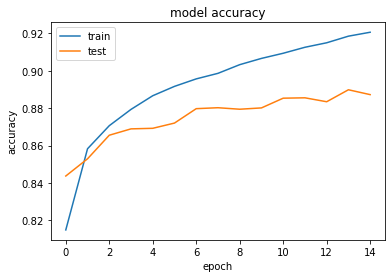

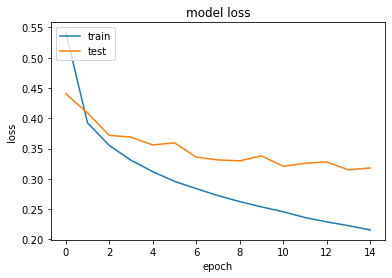

In [13]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
nn = tf.keras.Sequential()
nn.add(tf.keras.layers.Flatten(input_shape=(28,28)))
nn.add(tf.keras.layers.Dense(128, activation='sigmoid'))
nn.add(tf.keras.layers.Dense(10, activation='softmax'))

nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


history = nn.fit(training_images, training_labels, epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5452 - accuracy: 0.8145 - val_loss: 0.4427 - val_accuracy: 0.8415racy:  - ETA: 0s - loss: 0.6126 - accuracy: 0. - ETA: 0s - loss:
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3902 - accuracy: 0.8595 - val_loss: 0.3995 - val_accuracy: 0.8577
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3550 - accuracy: 0.8722 - val_loss: 0.3823 - val_accuracy: 0.8642
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3298 - accuracy: 0.8796 - val_loss: 0.3697 - val_accuracy: 0.8686
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3101 - accuracy: 0.8874 - val_loss: 0.3518 - val_accuracy: 0.8749
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2965 - accuracy: 0.8910 - val_loss: 0.3514 - val_accuracy: 0.8718
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - lo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


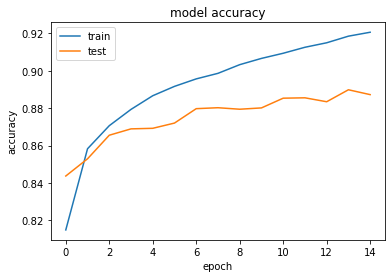

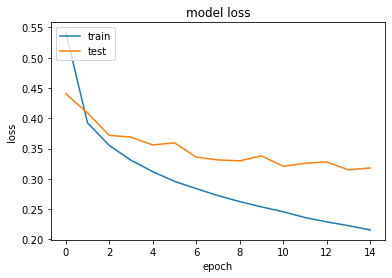

In [16]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Tu respuesta a la pregunta 8.3 aquí:
Como vemos en las gráficas los valores de la función de perdida se empieza a mantener. Si continuaramos aumentando las epochs, se vería como en la gráfica el valor de loss empieza a aumentar.

Esto es debido al 'overfitting' que está sufriendo el modelo. Es decir, nuestro modelo está memorizando los datos de entrenamiento o especializandose solo con los datos de entrenamiento y no está generalizando bien con los datos de test.

# Ejercicio 6: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del ejemplo de código que

 se da, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para
evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [59]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!! ")
              self.model.stop_training = True

**Pregunta 9 (2 puntos)**: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [63]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')< 0.4):
              print("\nAlcanzado el 40% de función de perdida, se cancela el entrenamiento!! ")
              self.model.stop_training = True


callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.3.0
Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4734 - accuracy: 0.8317
Epoch 2/50
1860/1875 [============================>.] - ETA: 0s - loss: 0.3607 - accuracy: 0.8682
Alcanzado el 40% de función de perdida, se cancela el entrenamiento!! 
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3613 - accuracy: 0.8680
